#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [2]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # pandas
import numpy as np # numpy
import time

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [3]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [4]:
path = "final_house_loan.csv" 

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

Histogram của `Loan Sanction Amount` theo một số biến

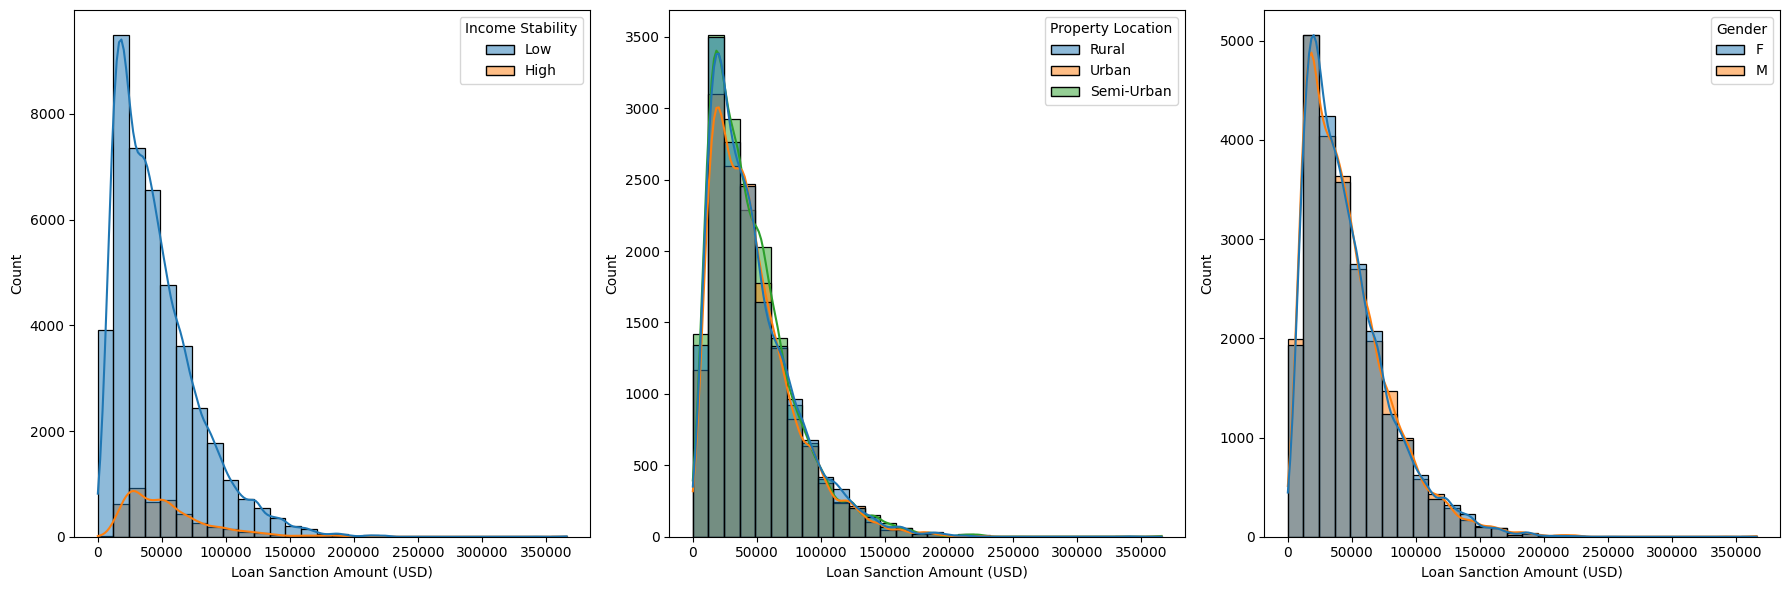

In [5]:
plt.figure(figsize=(18, 6))

features = ["Income Stability","Property Location","Gender"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x="Loan Sanction Amount (USD)", hue=features[i], kde=True, bins=30)

plt.tight_layout()
plt.show()

Scatter của một số biến với `Loan Sanction Amount`

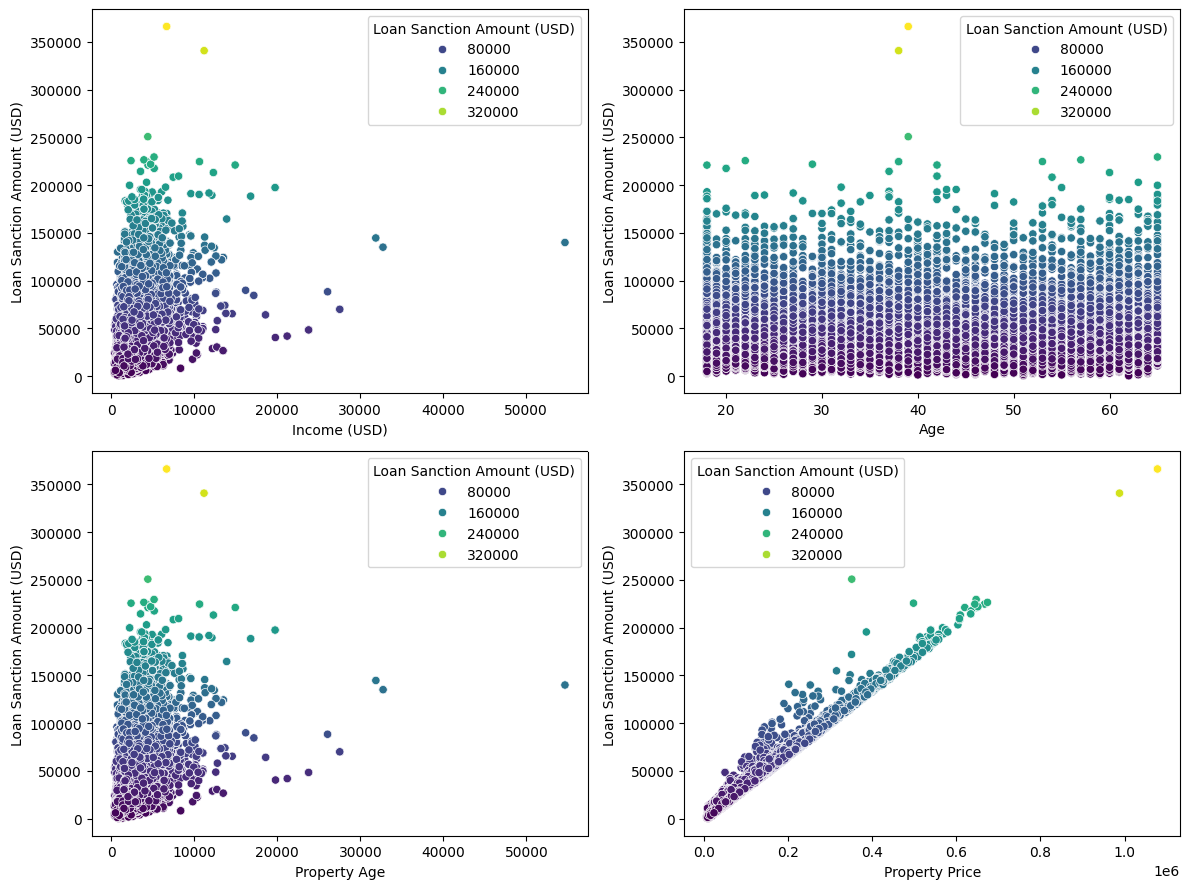

In [6]:

plt.figure(figsize=(12, 9))

features = ["Income (USD)", "Age", "Property Age", "Property Price"]

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df, x=features[i], y="Loan Sanction Amount (USD)", hue="Loan Sanction Amount (USD)", palette="viridis")

plt.tight_layout()
plt.show()


Histogram của `Age, Income, Property Age, Property Price`

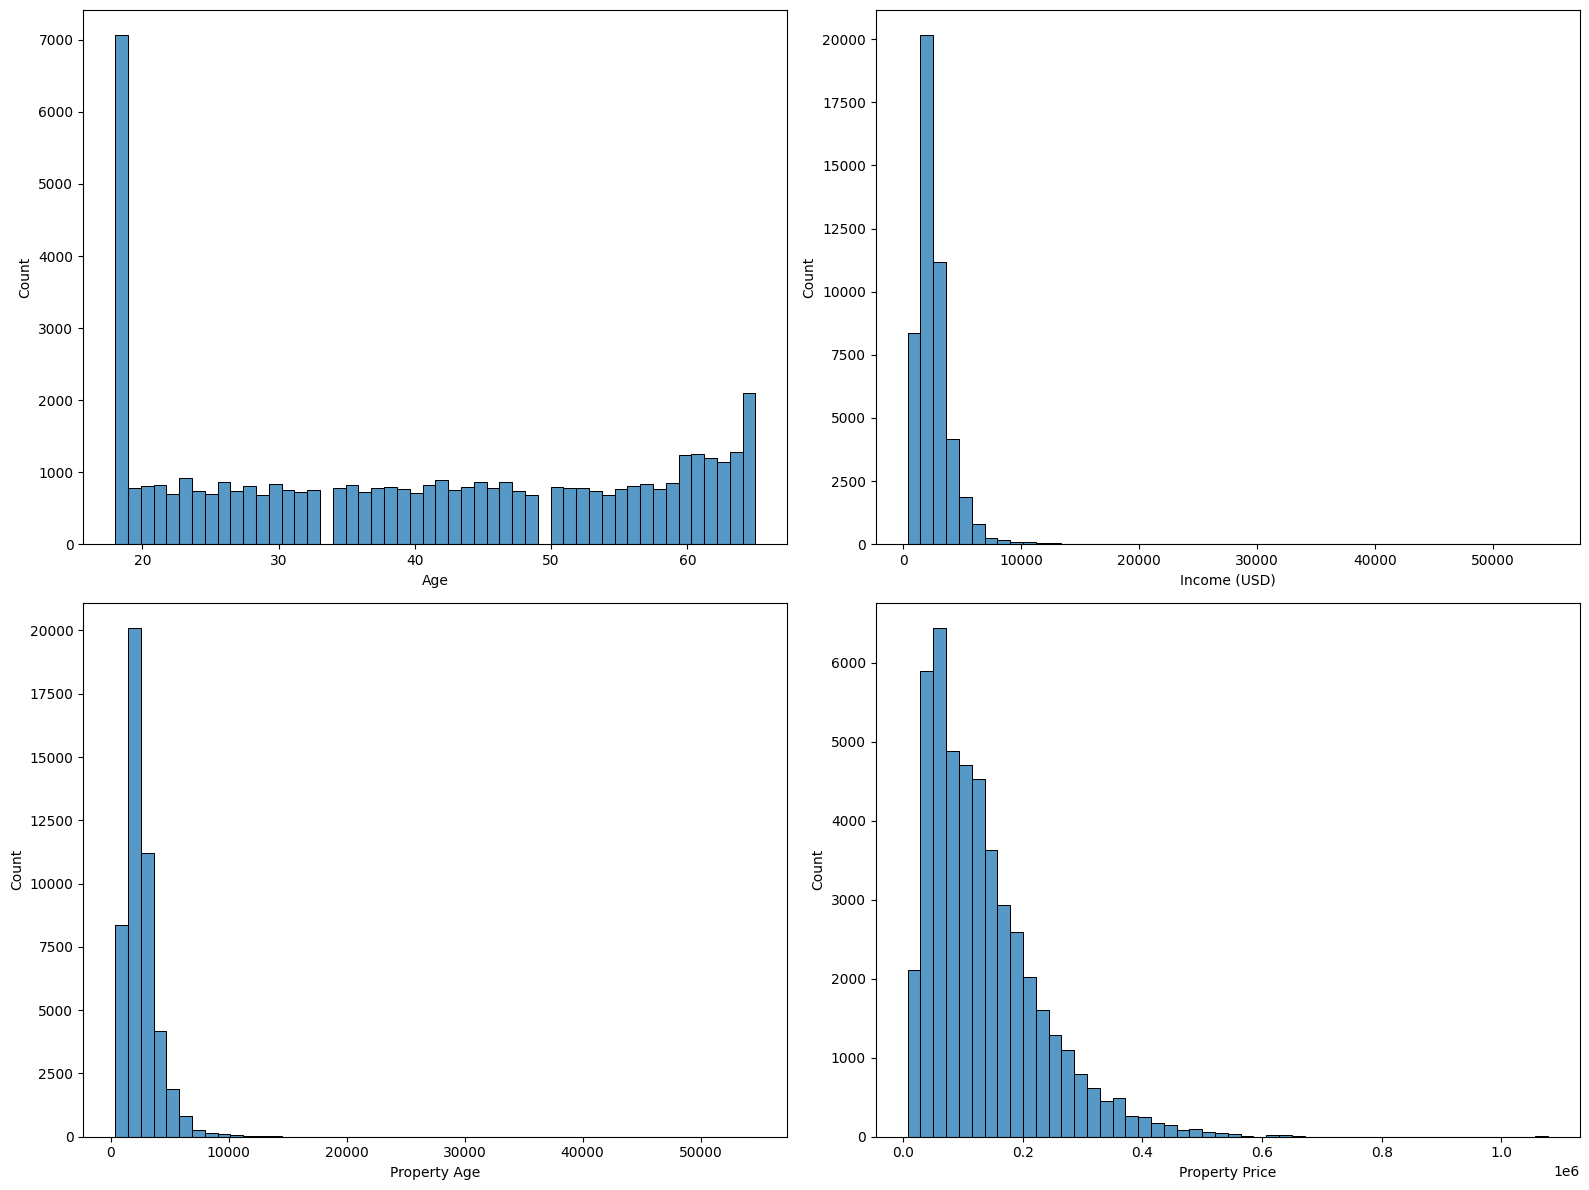

In [7]:
plt.figure(figsize=(16, 12))

features = ["Age", "Income (USD)", "Property Age", "Property Price"]

for i in range(4):  
    plt.subplot(2, 2, i+1)  
    sns.histplot(x=features[i], data=df, bins=50)
plt.tight_layout()
plt.show()


## Preprocessing

Phần trăm missing value

In [8]:
df.isnull().sum()/len(df) * 100

Gender                        0.000000
Age                           0.000000
Income (USD)                  0.067658
Income Stability              0.025372
Property Age                  0.071886
Property Location             0.006343
Property Price                0.000000
Loan Sanction Amount (USD)    0.000000
dtype: float64

Phần trăm rất nhỏ, không đáng kể nên drop missing value

In [9]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    print("Sample size:", len(df))
    df = df.dropna()
    print("Not null sample size:", len(df)) 
    df = df
    return df

In [10]:
df = preprocessing_data(df.copy())

Sample size: 47297
Not null sample size: 47251


## Feature Engineering

In [11]:
def normalize_data(df):
    start_time = time.time()
    # data normalization
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes
    
    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data

In [12]:
normalize_data(df.copy())

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.057878971099853516


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,0,62,2121.48,1,2135.48,0,240291.63,78800.491330
47293,1,38,1506.72,1,1505.72,0,218431.37,72483.293359
47294,0,20,1595.10,1,1582.10,1,154458.88,52462.861498
47295,0,50,2002.27,1,2007.27,1,72277.78,22909.596763


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.058977365493774414


<Axes: >

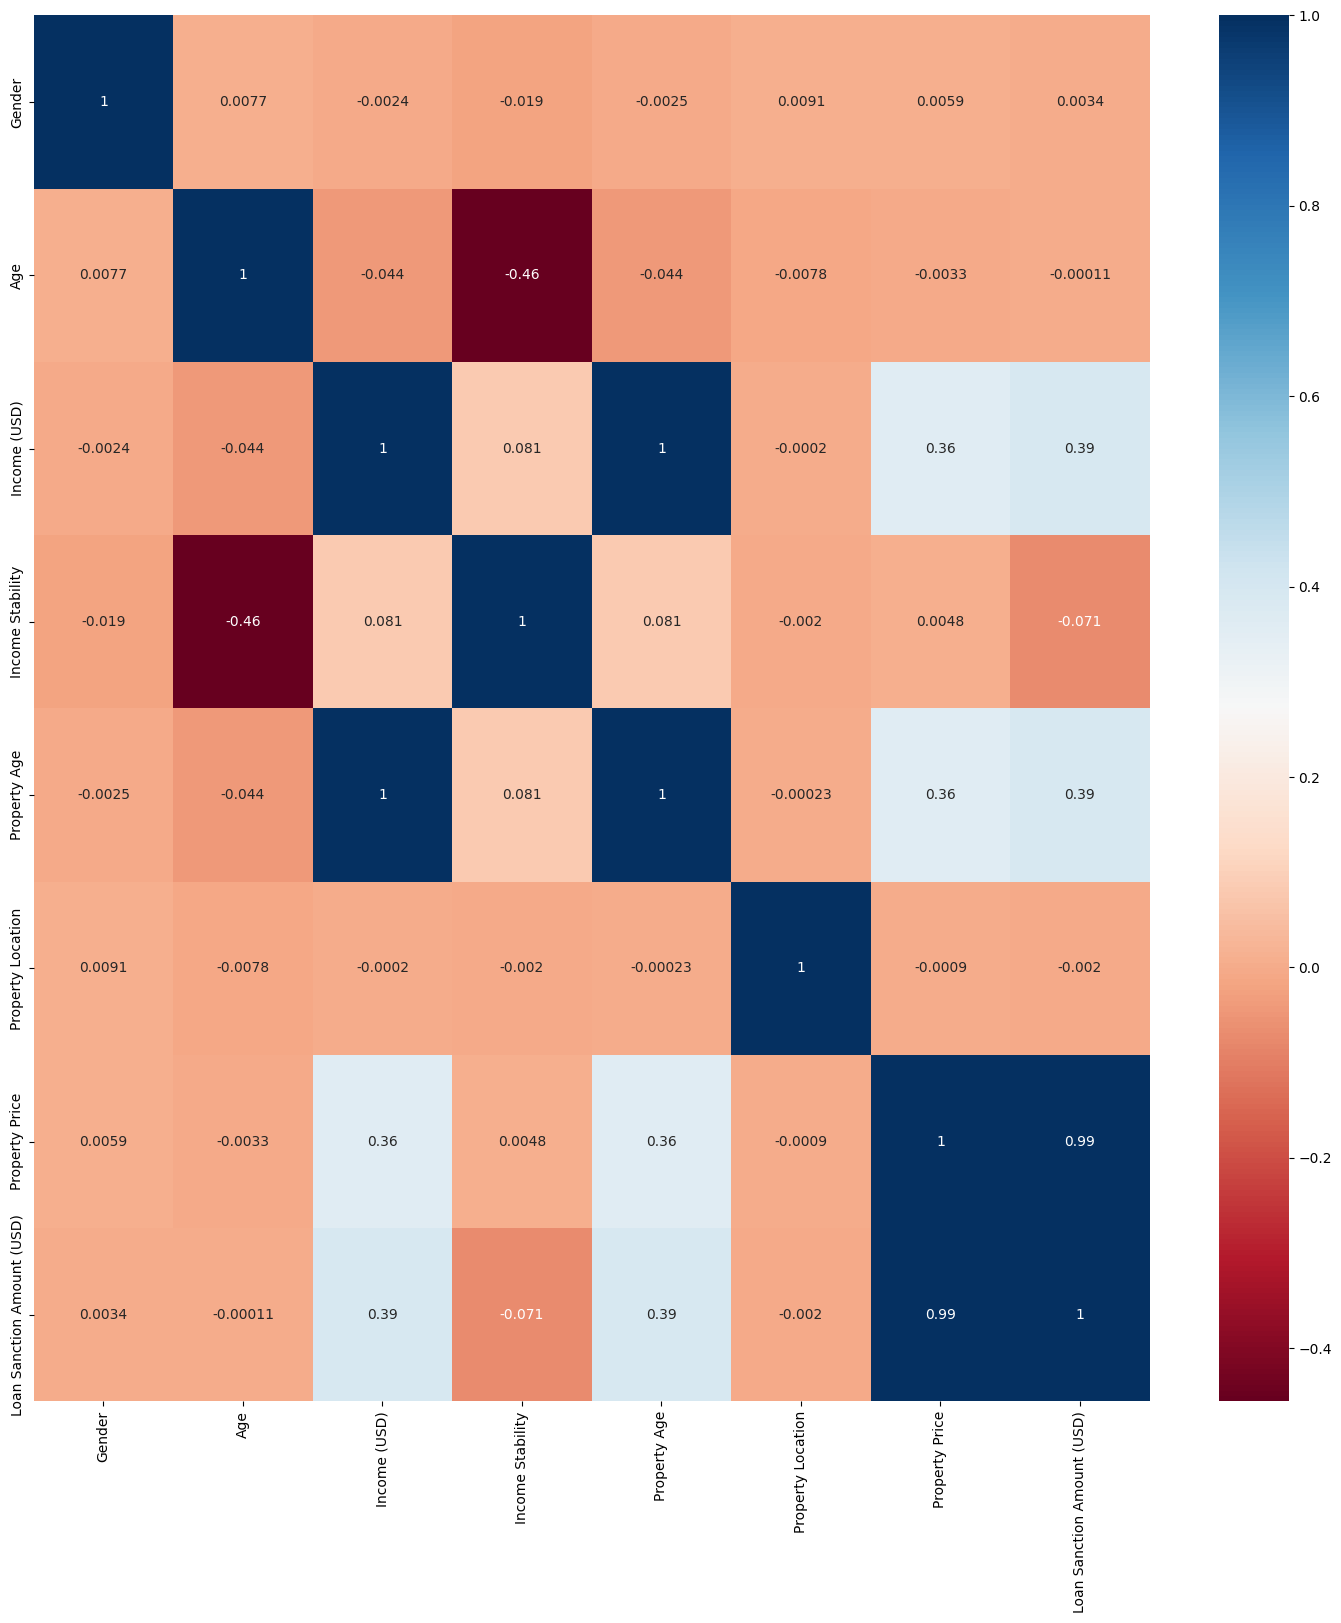

In [13]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, cmap="RdBu") # Show heatmap after normalized data

# Apply machine learning model

## Train-test split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [15]:
def prepare_X_y(df):
    
    y = df.pop('Loan Sanction Amount (USD)')
    X = df
    return X, y

X, y = prepare_X_y(df)

In [16]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY

In [17]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


## Basic Linear Regression

In [18]:
from sklearn.metrics import r2_score
def print_result(model):
    # Compare on training dataset
    print("Result of", model)
    
    pred = model.predict(trainX)
    print("MAE on train set: ", mean_absolute_error(y_pred=pred, y_true=trainY))
    pred = model.predict(testX)
    print("MAE on test set: ", mean_absolute_error(y_pred= pred, y_true=testY))
    r2 = r2_score(testY, model.predict(testX))
    print("R2 Score: ", r2)

    print("Coef: \n", model.coef_) # print coefficient
    print()
    print("Intercept: ", model.intercept_) # print intercept_``



### Linear Regression


In [19]:
from sklearn.linear_model import LinearRegression


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(trainX, trainY)

    return model

linear_model = build_linear_model(trainX, trainY)
# Compare on training dataset
print_result(linear_model)

Result of LinearRegression()
MAE on train set:  163.14116153101304
MAE on test set:  137.1045750669135
R2 Score:  0.9989921047788693
Coef: 
 [-2.34483815e+02 -7.93861753e+01  5.50183711e-01 -1.11431363e+04
  4.74551612e-01 -6.02929137e+01  3.36339576e-01]

Intercept:  11896.351699426064


### Lasso 

In [20]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
    model = Lasso(alpha = 0.1, fit_intercept=True)
    model.fit(trainX, trainY)

    return model

lasso_model = build_lasso_model(trainX, trainY)
print_result(lasso_model)

Result of Lasso(alpha=0.1)
MAE on train set:  163.23946481846966
MAE on test set:  137.18601146450388
R2 Score:  0.9989920799990404
Coef: 
 [-2.34105077e+02 -7.93721152e+01  8.56027193e-01 -1.11414460e+04
  1.68715071e-01 -6.01717538e+01  3.36339629e-01]

Intercept:  11893.906187251


c:\Users\hnam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


### Ridge

In [21]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = Ridge(alpha = 0.1, fit_intercept=True)
    model.fit(trainX, trainY)

    return model

ridge_model = build_ridge_model(trainX, trainY)
print_result(ridge_model)

Result of Ridge(alpha=0.1)
MAE on train set:  163.15382295208914
MAE on test set:  137.11613614822937
R2 Score:  0.998992102134668
Coef: 
 [-2.34476749e+02 -7.93819426e+01  5.50315153e-01 -1.11426048e+04
  4.74413756e-01 -6.02918644e+01  3.36339608e-01]

Intercept:  11895.705542028183


### ElasticNet

In [23]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = ElasticNet(alpha = 1e-5, fit_intercept=True)
    model.fit(trainX, trainY)

    return model

e_model = build_elastic_model(trainX, trainY)
print_result(e_model)


Result of ElasticNet(alpha=1e-05)
MAE on train set:  163.20255409856347
MAE on test set:  137.14869773158952
R2 Score:  0.9989920937095067
Coef: 
 [-2.34503756e+02 -7.93782428e+01  8.56028214e-01 -1.11421719e+04
  1.68721941e-01 -6.03231635e+01  3.36339597e-01]

Intercept:  11895.144351668358


c:\Users\hnam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.299e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


### So sánh 3 thuật toán với `Linear Regression`

In [66]:
def cal_mae(model):
    pred_train = model.predict(trainX)
    pred_test = model.predict(testX)
    mae_train = mean_absolute_error(y_pred=pred_train, y_true=trainY)
    mae_test = mean_absolute_error(y_pred=pred_test, y_true=testY)
    return mae_train, mae_test

models = [linear_model, lasso_model, ridge_model, e_model]
print(f"{'Model':<20} {'Tập test':<20} {'Tập train':<20}")
print("-" * 51)
for model in models:
    mae_train, mae_test = cal_mae(model)
    print(f"{model.__class__.__name__:<20} {mae_train:<20.2f} {mae_test:<20.2f}")


Model                Tập test             Tập train           
---------------------------------------------------
LinearRegression     163.14               137.10              
Lasso                163.24               137.19              
Ridge                163.15               137.12              
ElasticNet           163.20               137.15              


- Nhìn chung cả 4 thuật toán cho hiệu suất gần như tương tự nhau
- Linear Regression có phần nhỉnh hơn (không đáng kể) với 3 thuật toán còn lại

## Polynomial Transform

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [67]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, degree = 2):
    poly_model = make_pipeline(PolynomialFeatures(degree = degree, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model

degree = [2, 3, 4, 5, 6]
for i in range(len(degree)):
    poly_model = build_pipeline(trainX, trainY, degree[i])
    # Compare on training dataset
    poly_pred = poly_model.predict(trainX)
    print("Degree: ", degree[i])
    print("MAE of linear model (poly transform) on train set: ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

    poly_pred = poly_model.predict(testX)
    print("MAE of linear model (poly transform) on test set: ", mean_absolute_error(y_pred=poly_pred, y_true=testY))
    print("--"*30)


Degree:  2
MAE of linear model (poly transform) on train set:  159.71131291127853
MAE of linear model (poly transform) on test set:  133.8521465859769
------------------------------------------------------------
Degree:  3
MAE of linear model (poly transform) on train set:  247.3577585102813
MAE of linear model (poly transform) on test set:  224.6042051248823
------------------------------------------------------------
Degree:  4
MAE of linear model (poly transform) on train set:  3215.646355930716
MAE of linear model (poly transform) on test set:  3227.271900682027
------------------------------------------------------------
Degree:  5
MAE of linear model (poly transform) on train set:  5759.246179453234
MAE of linear model (poly transform) on test set:  5787.758732781788
------------------------------------------------------------
Degree:  6
MAE of linear model (poly transform) on train set:  9244.26270570425
MAE of linear model (poly transform) on test set:  9419.743979930947
------

**Nhận xét**

Khi bậc càng cao sự sai khác giữa tập train và tập test càng lớn vì:

- Khi bậc của đa thức trong mô hình Polynomial Regression quá cao, tức là mô hình có bậc cao, mô hình có khả năng quá mức fit dữ liệu huấn luyện. Điều này có thể dẫn đến hiện tượng overfitting.

- Overfitting xảy ra khi mô hình học quá nhiều chi tiết từ dữ liệu huấn luyện, bao gồm cả nhiễu, và không thể tổng quát hóa tốt trên dữ liệu mới. Trong trường hợp này, mô hình có thể trở nên rất nhạy cảm với những biến động nhỏ trong dữ liệu huấn luyện, dẫn đến dự đoán không chính xác trên dữ liệu kiểm tra hoặc dữ liệu mới.